# Mašinsko učenje
## Projekat 1 - Nadgledano učenje
### Nikola Vukotić 1401,  Željko Balanović 1533
### Prognoza rizika od dijabetesa
#### Dataset: https://archive.ics.uci.edu/ml/datasets/Early+stage+diabetes+risk+prediction+dataset.
#### Klasifikacija
#### Google Search : diabetes site:archive.ics.uci.edu/ml site:ics.uci.edu

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sn
import math
import statistics
import scipy.stats

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.dummy import DummyClassifier
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA
from statistics import mean
from scipy.stats import uniform


In [136]:
pip install hyperopt 

     ---------------------------------------- 1.6/1.6 MB 3.5 MB/s eta 0:00:00
     -------------------------------------- 200.5/200.5 kB 4.1 MB/s eta 0:00:00
     ---------------------------------------- 2.0/2.0 MB 3.3 MB/s eta 0:00:00
     -------------------------------------- 829.2/829.2 kB 3.5 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
Using legacy 'setup.py install' for future, since package 'wheel' is not installed.
  Running setup.py install for future: started
  Running setup.py install for future: finished with status 'done'

[notice] A new release of pip available: 22.1.2 -> 22.3.1
[notice] To update, run: c:\users\nikol\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
data_df = pd.read_csv('diabetes_data.csv')

In [3]:
data_df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [4]:
data_df

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,Female,Yes,Yes,Yes,No,Yes,No,No,Yes,No,Yes,Yes,No,No,No,Positive
516,48,Female,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,No,No,No,Positive
517,58,Female,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,No,Yes,Yes,No,Yes,Positive
518,32,Female,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,No,Yes,No,Negative


In [5]:
data_df.shape

(520, 17)

In [6]:
result = scipy.stats.describe(data_df["Age"], ddof=1, bias=False)
result

DescribeResult(nobs=520, minmax=(16, 90), mean=48.02884615384615, variance=147.65812583370388, skewness=0.3293593578272701, kurtosis=-0.19170941407070163)

In [7]:
data_df.describe()

,Age
count,520.000000
mean,48.028846
std,12.151466
min,16.000000
25%,39.000000
50%,47.500000
75%,57.000000
max,90.000000


In [8]:
data_df.count()

Age                   520
Gender                520
Polyuria              520
Polydipsia            520
sudden weight loss    520
weakness              520
Polyphagia            520
Genital thrush        520
visual blurring       520
Itching               520
Irritability          520
delayed healing       520
partial paresis       520
muscle stiffness      520
Alopecia              520
Obesity               520
class                 520
dtype: int64

In [9]:
print('Maximum of column Age: ', data_df['Age'].max())
print('Minimum of column Age: ', data_df['Age'].min())
print('Mean of column Age: ', data_df['Age'].mean())
print('Count of column Age: ', data_df['Age'].count())

Maximum of column Age:  90
Minimum of column Age:  16
Mean of column Age:  48.02884615384615
Count of column Age:  520


array([[<AxesSubplot:title={'center':'Age'}>]], dtype=object)

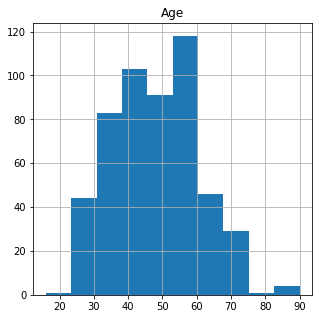

In [10]:
data_df.hist(figsize = (5,5))

## Konsultacije: 30.11.2022.
### balansiranje podataka obavezno proveriti
### OUTLIERI - pronaci i videti kako ih se resiti
### problem: mala kolicina podataka, za kasnije faze moze biti problem, da se shvati
### koji algoritam daje najbolje resenje, takodje moze biti problematicno kod redukcije feature-a
### -------------------------------------------------------------------------------------------------------------------------------------------

### Obrada kategorickih podataka

In [11]:
data_df['Gender'] = [1 if gender=='Male' else 0 for gender in data_df.Gender]
data_df['class'] = [1 if class_att=='Positive' else 0 for class_att in data_df.get('class')]

columns_name = list(data_df)
columns_name = columns_name[2:16]

for col in columns_name:
    data_df[col] = [1 if b=='Yes' else 0 for b in data_df.get(col)]

data_df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


### Obrada nedostajucih podataka - Zakljucak: nema takvih:

In [12]:
missing = data_df.isna()
missing

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
516,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
517,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
518,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [13]:
missing.sum()

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

In [14]:
anymissing = missing.any(axis=1)
anymissing

0      False
1      False
2      False
3      False
4      False
       ...  
515    False
516    False
517    False
518    False
519    False
Length: 520, dtype: bool

In [15]:
data_df[anymissing]

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class


<AxesSubplot:>

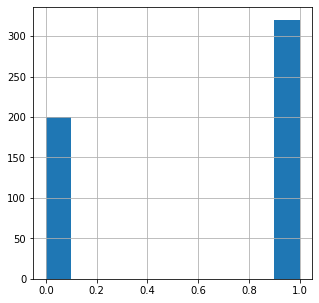

In [16]:
data_df['class'].hist(figsize = (5,5))

### Deskriptivna analiza

In [17]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Age                 520 non-null    int64
 1   Gender              520 non-null    int64
 2   Polyuria            520 non-null    int64
 3   Polydipsia          520 non-null    int64
 4   sudden weight loss  520 non-null    int64
 5   weakness            520 non-null    int64
 6   Polyphagia          520 non-null    int64
 7   Genital thrush      520 non-null    int64
 8   visual blurring     520 non-null    int64
 9   Itching             520 non-null    int64
 10  Irritability        520 non-null    int64
 11  delayed healing     520 non-null    int64
 12  partial paresis     520 non-null    int64
 13  muscle stiffness    520 non-null    int64
 14  Alopecia            520 non-null    int64
 15  Obesity             520 non-null    int64
 16  class               520 non-null    int64
dt

### Measure of Center: Mean and Median

In [18]:
mean = data_df.mean()
print(mean)

Age                   48.028846
Gender                 0.630769
Polyuria               0.496154
Polydipsia             0.448077
sudden weight loss     0.417308
weakness               0.586538
Polyphagia             0.455769
Genital thrush         0.223077
visual blurring        0.448077
Itching                0.486538
Irritability           0.242308
delayed healing        0.459615
partial paresis        0.430769
muscle stiffness       0.375000
Alopecia               0.344231
Obesity                0.169231
class                  0.615385
dtype: float64


In [19]:
median = data_df.median()
print(median)

Age                   47.5
Gender                 1.0
Polyuria               0.0
Polydipsia             0.0
sudden weight loss     0.0
weakness               1.0
Polyphagia             0.0
Genital thrush         0.0
visual blurring        0.0
Itching                0.0
Irritability           0.0
delayed healing        0.0
partial paresis        0.0
muscle stiffness       0.0
Alopecia               0.0
Obesity                0.0
class                  1.0
dtype: float64


### Measures of Variabillity

#### Standard Deviation

In [20]:
std_deviation = data_df.std()
print(std_deviation)

Age                   12.151466
Gender                 0.483061
Polyuria               0.500467
Polydipsia             0.497776
sudden weight loss     0.493589
weakness               0.492928
Polyphagia             0.498519
Genital thrush         0.416710
visual blurring        0.497776
Itching                0.500300
Irritability           0.428892
delayed healing        0.498846
partial paresis        0.495661
muscle stiffness       0.484589
Alopecia               0.475574
Obesity                0.375317
class                  0.486973
dtype: float64


#### Variance

In [21]:
variance = data_df.var()
print(variance)

Age                   147.658126
Gender                  0.233348
Polyuria                0.250467
Polydipsia              0.247780
sudden weight loss      0.243631
weakness                0.242978
Polyphagia              0.248522
Genital thrush          0.173648
visual blurring         0.247780
Itching                 0.250300
Irritability            0.183948
delayed healing         0.248848
partial paresis         0.245680
muscle stiffness        0.234827
Alopecia                0.226171
Obesity                 0.140863
class                   0.237142
dtype: float64


#### Skewness 
##### Na koju stranu je iskrivljenje, 0 je normalna distribucija

In [22]:
skewness = data_df.skew()
print(skewness)

Age                   0.329359
Gender               -0.543509
Polyuria              0.015430
Polydipsia            0.209426
sudden weight loss    0.336359
weakness             -0.352476
Polyphagia            0.178134
Genital thrush        1.334223
visual blurring       0.209426
Itching               0.054022
Irritability          1.206305
delayed healing       0.162537
partial paresis       0.280426
muscle stiffness      0.517893
Alopecia              0.657608
Obesity               1.769420
class                -0.475715
dtype: float64


#### Summary

In [23]:
data_df.describe(include='all')

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
count,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000
mean,48.028846,0.630769,0.496154,0.448077,0.417308,0.586538,0.455769,0.223077,0.448077,0.486538,0.242308,0.459615,0.430769,0.375000,0.344231,0.169231,0.615385
std,12.151466,0.483061,0.500467,0.497776,0.493589,0.492928,0.498519,0.416710,0.497776,0.500300,0.428892,0.498846,0.495661,0.484589,0.475574,0.375317,0.486973
min,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,47.500000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,90.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Distribucija podataka - Graficki prikaz

c:\users\nikol\appdata\local\programs\python\python38\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


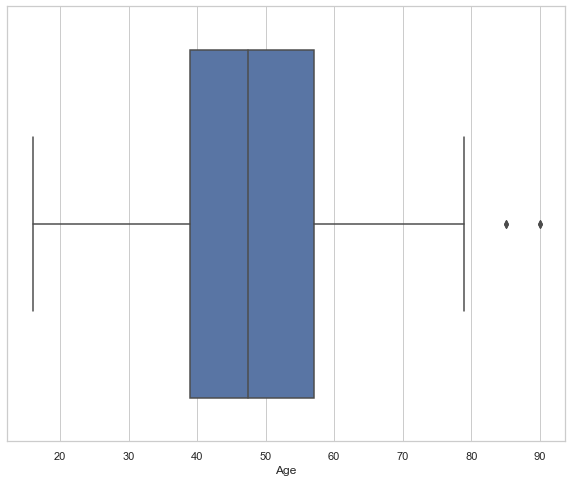

In [24]:
%matplotlib inline

sn.set(style="whitegrid")
plt.figure(figsize=(10,8))
ax = sn.boxplot(x='Age', data=data_df, orient="v")

c:\users\nikol\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age'>

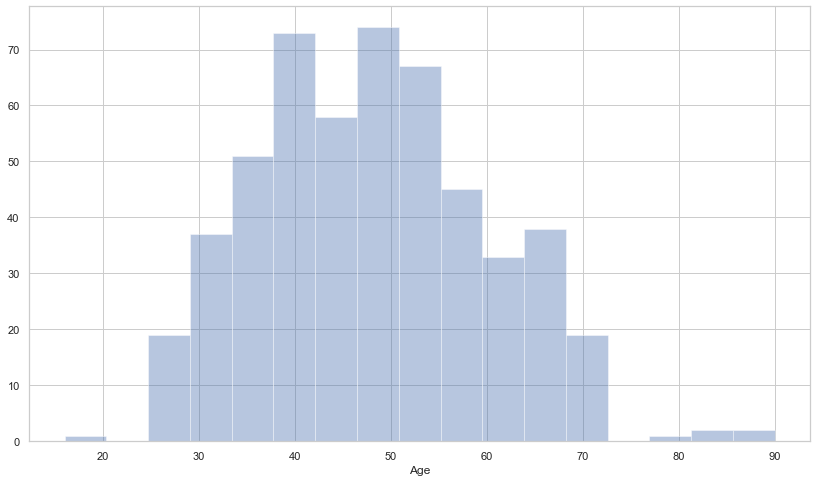

In [25]:
filter_data = data_df.dropna(subset=['Age'])
plt.figure(figsize=(14,8))
sn.distplot(filter_data['Age'], kde=False)

### Outlejeri - detekcija

In [26]:
feature = data_df["Age"]

q1, q3 = np.percentile(feature, [25, 75])
iqr = q3 - q1
lower_bound = q1 - (iqr * 1.5)
upper_bound = q3 + (iqr * 1.5)
outliers = np.where((feature > upper_bound) | (feature < lower_bound))

data_df.iloc[outliers[0]]

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
101,85,1,1,1,1,1,1,1,1,1,0,1,1,1,0,0,1
102,90,0,0,1,1,0,0,1,1,1,0,0,0,1,1,0,1
185,85,1,1,1,1,1,1,1,1,1,0,1,1,1,0,0,1
186,90,0,0,1,1,0,0,1,1,1,0,0,0,1,1,0,1


## Balansiranost i resavanje problema:

<AxesSubplot:ylabel='class'>

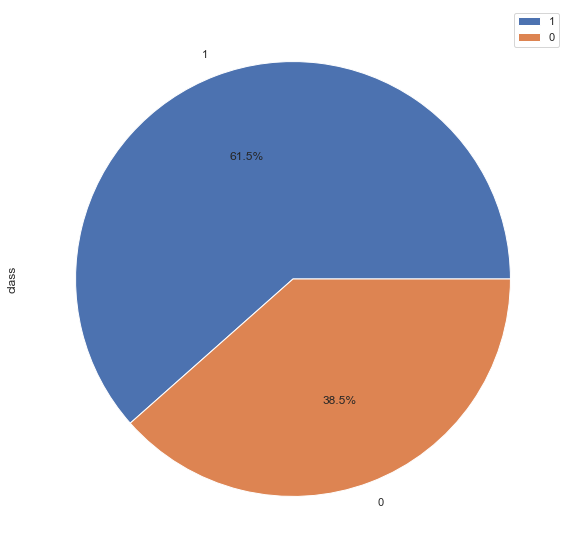

In [27]:
type_counts = data_df['class'].value_counts()
df2 = pd.DataFrame({'class': type_counts})
df2.plot.pie(y='class', figsize=(10,10), autopct='%1.1f%%')

c:\users\nikol\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='class'>

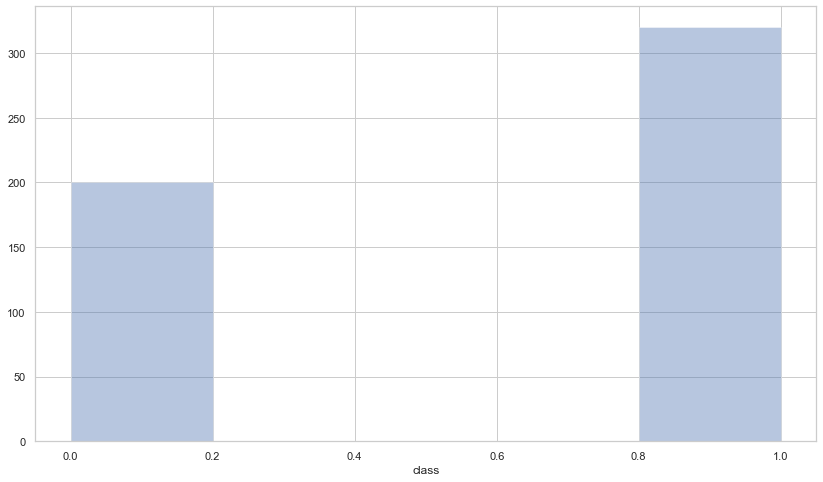

In [28]:
filter_data = data_df.dropna(subset=['class'])
plt.figure(figsize=(14,8))
sn.distplot(filter_data['class'], kde=False)

Negative:  200
Positive:  320


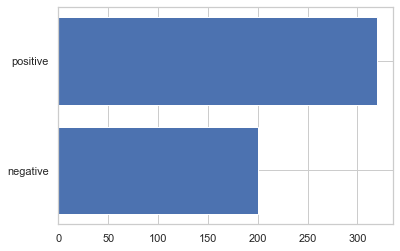

In [29]:
positive_count, negative_count = data_df['class'].value_counts()
plt.barh(["negative","positive"], [negative_count, positive_count])
print("Negative:  "+ str(negative_count))
print("Positive:  "+ str(positive_count))

## Underseampling

Negative:  200
Positive:  200


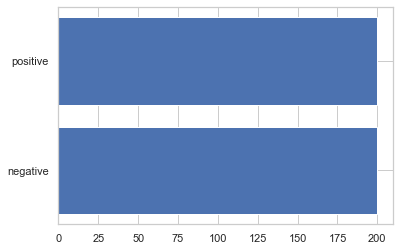

In [30]:
from sklearn.utils import resample

df_majority_US = data_df[data_df['class'] == 1]
df_minority_US = data_df[data_df['class'] == 0]

df_majority_undersampled = resample(df_majority_US, replace = False, n_samples = negative_count, random_state = 0)
df_undersampled = pd.concat([df_majority_undersampled, df_minority_US])
undersampled_positive_count, undersampled_negative_count = df_undersampled['class'].value_counts()

plt.barh(["negative","positive"], [undersampled_negative_count, undersampled_positive_count])
print("Negative:  "+ str(undersampled_negative_count))
print("Positive:  "+ str(undersampled_positive_count))

## Upseampling

NEGATIVE:  320
POSITIVE:  320


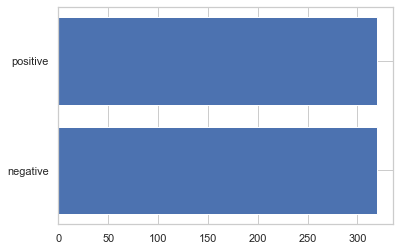

In [31]:
df_majority_OS = data_df[data_df['class'] == 1]
df_minority_OS = data_df[data_df['class'] == 0]

df_minority_upsampled = resample(df_minority_OS, replace=True, n_samples=positive_count, random_state=0)
df_upsampled = pd.concat([df_majority_OS, df_minority_upsampled])
oversampled_positive_count, oversampled_negative_count = df_upsampled['class'].value_counts()

plt.barh(["negative","positive"], [oversampled_negative_count, oversampled_positive_count])
print("NEGATIVE:  "+ str(oversampled_negative_count))
print("POSITIVE:  "+ str(oversampled_positive_count))

## Pitanja za 7.12.2022

### 1. Sta je bolje upseampling ili underseampling? 
     Mozda upseampling jer ima vise podataka obzirom da je dataset svakako mali?
### 2. Ideja: Dalja testiranja i projekat raditi sa nebalansiranim, balansiranim up i balansiranim under, pa da vidimo sta se dogadja?
### 3. Outlejeri, da li je u redu? Ako jeste, posto ih je relativno malo da li je u redu da ostanu u podacima?

#### Dalju analizu probati i sa nebalansiranim i balansiranim (up i down), takodje isprobati i sa i bez outlier-a.
#### --------------------------------------------------------------------------------------------------------------------------------------------------------

### Test and Train data 80%:20%

In [32]:
from sklearn.model_selection import cross_val_score, train_test_split, learning_curve, validation_curve

#### Nebalansirani podaci

In [33]:
X_imbalanced = data_df.drop("class", axis=1).values
y_imbalanced = data_df["class"].values

X_train_imbalanced ,X_test_imbalanced, y_train_imbalanced, y_test_imbalanced = train_test_split(X_imbalanced,y_imbalanced,test_size = 0.2, random_state = 1)

#### Balansirani - Underseampling

In [34]:
X_undersampled = df_undersampled.drop("class",axis = 1).values
y_undersampled = df_undersampled["class"].values

X_train_undersampled,X_test_undersampled, y_train_undersampled, y_test_undersampled = train_test_split(X_undersampled,y_undersampled,test_size = 0.2, random_state = 1)

#### Balansirani - Upseampling

In [35]:
X_upsampled = df_upsampled.drop("class",axis = 1).values
y_upsampled = df_upsampled["class"].values

X_train_upsampled,X_test_upsampled, y_train_upsampled, y_test_upsampled = train_test_split(X_upsampled,y_upsampled,test_size = 0.2, random_state = 1)

#### Scikit-learn map - Choosing right Classificator
https://scikit-learn.org/stable/tutorial/machine_learning_map/

### Pomocne metode za evaluaciju

In [36]:
def evaluate_model(y_true_, y_pred_):
    accuracy = accuracy_score(y_true_, y_pred_)
    f1 = f1_score(y_true_, y_pred_)
    precision = precision_score(y_true_, y_pred_)
    recall = recall_score(y_true_, y_pred_)
    conf_matrix = confusion_matrix(y_true=y_true_, y_pred=y_pred_)
    TN, FP, FN, TP = conf_matrix.ravel()
    sensitivity = TP / (TP + FN)
    specificity = TN / (TN + FP)

    print("Accuracy : ", accuracy)
    print("F1 Score: ", f1)
    print("Precision: ", precision)
    print("Recall: ", recall)
    print("Confuse matrix:")
    print(conf_matrix)
    print("True positive: ", TP)
    print("False positive: ", FP)
    print("True negative: ", TN)
    print("False negative: ", FN)
    print("Sensitivity: ", sensitivity)
    print("Specificity: ", specificity)

# Matrice konfuzije
def plot_conf_matrix(matrix):
    class_names=['N','P']

    # Create pandas dataframe
    dataframe = pd.DataFrame(matrix, index=class_names, columns=class_names)

    # Create heatmap
    sn.heatmap(dataframe, annot=True, cbar=None, cmap="Blues")
    plt.title("Confusion Matrix"), plt.tight_layout()
    plt.ylabel("True Class"), plt.xlabel("Predicted Class")
    plt.show()    

# Plot AUC-ROC Curve
def auc_roc_plot(test, prediction):
    fpr, tpr, threshold = roc_curve(test, prediction)
    roc_auc = auc(fpr, tpr)

    plt.title('AUC-ROC curve')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

## LinearSVC

In [37]:
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV, GridSearchCV

from sklearn.metrics import accuracy_score

### Nebalansirani

In [38]:
#[https://www.dataquest.io/blog/sci-kit-learn-tutorial/]
svc_model = LinearSVC(random_state=0)
#train the algorithm on training data and predict using the testing data
pred = svc_model.fit(X_train_imbalanced, y_train_imbalanced).predict(X_test_imbalanced)
#print the accuracy score of the model
print("LinearSVC accuracy : ",accuracy_score(y_test_imbalanced, pred, normalize = True))

LinearSVC accuracy :  0.8461538461538461


c:\users\nikol\appdata\local\programs\python\python38\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


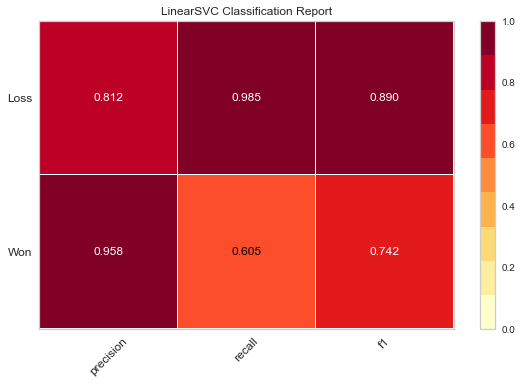

In [39]:
from yellowbrick.classifier import ClassificationReport
# Instantiate the classification model and visualizer
visualizer = ClassificationReport(svc_model, classes=['Won','Loss'])
visualizer.fit(X_train_imbalanced, y_train_imbalanced) # Fit the training data to the visualizer
visualizer.score(X_test_imbalanced, y_test_imbalanced) # Evaluate the model on the test data
g = visualizer.poof() # Draw/show/poof the data

In [40]:
#Kros validacija

scaler = StandardScaler()
svc_model = LinearSVC()

# create a pipeline that standardizes, that runs LinearSVC
pipeline = make_pipeline(scaler, svc_model)
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
svc_cv_results_imbalanced = cross_val_score(pipeline, X_imbalanced, y_imbalanced, cv=kf, scoring="accuracy", n_jobs=-1)

print(svc_cv_results_imbalanced)
print("Mean: ", svc_cv_results_imbalanced.mean())

[0.86538462 0.92307692 0.90384615 0.86538462 0.96153846 0.88461538
 0.98076923 0.92307692 0.94230769 0.98076923]
Mean:  0.923076923076923


### Balansirani (underseampling)

In [41]:
#[https://www.dataquest.io/blog/sci-kit-learn-tutorial/]
svc_model_undersampling = LinearSVC(random_state=0)
#train the algorithm on training data and predict using the testing data
pred = svc_model_undersampling.fit(X_train_undersampled, y_train_undersampled).predict(X_test_undersampled)
#print the accuracy score of the model
print("LinearSVC accuracy : ",accuracy_score(y_test_undersampled, pred, normalize = True))

LinearSVC accuracy :  0.9125


c:\users\nikol\appdata\local\programs\python\python38\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


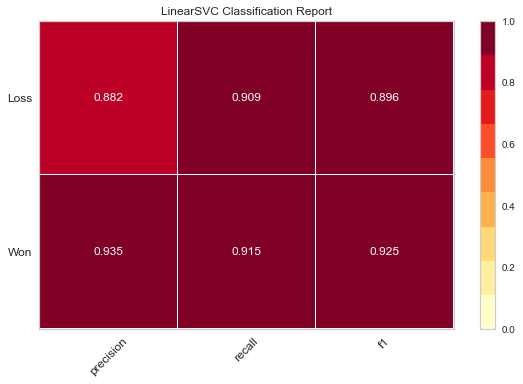

In [42]:
# Instantiate the classification model and visualizer
visualizer_undersampled = ClassificationReport(svc_model_undersampling, classes=['Won','Loss'])
visualizer_undersampled.fit(X_train_undersampled, y_train_undersampled) # Fit the training data to the visualizer
visualizer_undersampled.score(X_test_undersampled, y_test_undersampled) # Evaluate the model on the test data
g = visualizer_undersampled.poof() # Draw/show/poof the data

In [43]:
# Kros validacija
scaler = StandardScaler()
svc_model = LinearSVC()

# create a pipeline that standardizes, than runs LinearSVC
pipeline = make_pipeline(scaler, svc_model)
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
svc_cv_results_undersampled = cross_val_score(pipeline, X_undersampled, y_undersampled, cv=kf, scoring="accuracy", n_jobs=-1)

print(svc_cv_results_undersampled)
print("Mean: ", svc_cv_results_undersampled.mean())

[0.875 0.975 0.95  0.925 0.925 0.85  0.95  0.925 0.875 0.975]
Mean:  0.9225


### Balansirani (upseampling)

In [44]:
#[https://www.dataquest.io/blog/sci-kit-learn-tutorial/]
svc_model_upseampling = LinearSVC(random_state=0)
#train the algorithm on training data and predict using the testing data
pred = svc_model_upseampling.fit(X_train_upsampled, y_train_upsampled).predict(X_test_upsampled)
#print the accuracy score of the model
print("LinearSVC accuracy : ",accuracy_score(y_test_upsampled, pred, normalize = True))

LinearSVC accuracy :  0.890625


c:\users\nikol\appdata\local\programs\python\python38\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


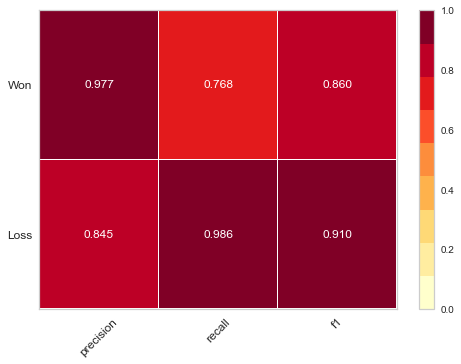

In [45]:
# Instantiate the classification model and visualizer
visualizer_upsampled = ClassificationReport(svc_model_upseampling, classes=['Won','Loss'])
visualizer_upsampled.fit(X_train_upsampled, y_train_upsampled) # Fit the training data to the visualizer
visualizer_upsampled.score(X_test_upsampled, y_test_upsampled) # Evaluate the model on the test data
g = visualizer_undersampled.poof() # Draw/show/poof the data

In [46]:
# Kros validacija
scaler = StandardScaler()
svc_model = LinearSVC()

# create a pipeline that standardizes, than runs LinearSVC
pipeline = make_pipeline(scaler, svc_model)
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
svc_cv_results_upsampled = cross_val_score(pipeline, X_upsampled, y_upsampled, cv=kf, scoring="accuracy", n_jobs=-1)

print(svc_cv_results_upsampled)
print("Mean: ", svc_cv_results_upsampled.mean())

[0.890625 0.90625  0.953125 0.890625 0.953125 0.9375   0.9375   0.953125
 0.84375  0.953125]
Mean:  0.921875


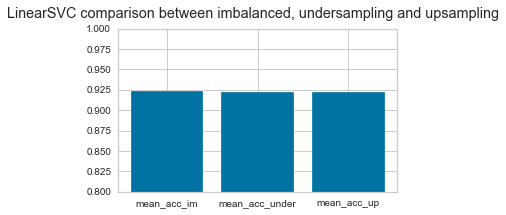

In [47]:
### Kros validacija, poredjenje 

plt.figure(figsize=(5, 3))
plt.ylim(0.8, 1.00)
plt.bar(['mean_acc_im', 'mean_acc_under', 'mean_acc_up'], [svc_cv_results_imbalanced.mean(), svc_cv_results_undersampled.mean(), svc_cv_results_upsampled.mean()])
plt.suptitle('LinearSVC comparison between imbalanced, undersampling and upsampling')
plt.show()

## KNearest Neighboars

### Nebalansirani

In [48]:
#import necessary modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
#create object of the lassifier
neigh = KNeighborsClassifier(n_neighbors=2)
#Train the algorithm
neigh.fit(X_train_imbalanced, y_train_imbalanced)
# predict the response
pred = neigh.predict(X_test_imbalanced)
# evaluate accuracy
print ("KNeighbors accuracy score : ",accuracy_score(y_test_imbalanced, pred))

KNeighbors accuracy score :  0.875


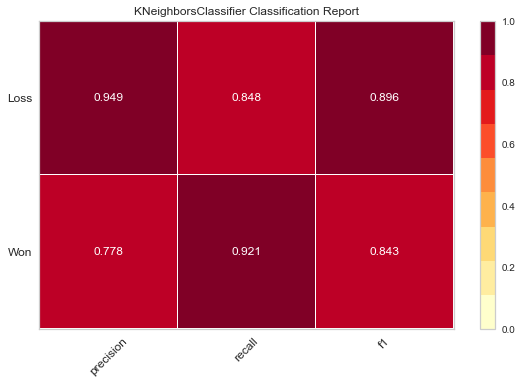

In [49]:
from yellowbrick.classifier import ClassificationReport
# Instantiate the classification model and visualizer
visualizer = ClassificationReport(neigh, classes=['Won','Loss'])
visualizer.fit(X_train_imbalanced, y_train_imbalanced) # Fit the training data to the visualizer
visualizer.score(X_test_imbalanced, y_test_imbalanced) # Evaluate the model on the test data
g = visualizer.poof() # Draw/show/poof the data

In [50]:
#Kros validacija

scaler = StandardScaler()
knn_classifier = KNeighborsClassifier(n_neighbors=5)

pipeline = make_pipeline(scaler, knn_classifier)
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
knn_cv_results_imbalanced = cross_val_score(pipeline, X_imbalanced, y_imbalanced, cv=kf, scoring="accuracy", n_jobs=-1)

print(knn_cv_results_imbalanced)
print("Mean: ", knn_cv_results_imbalanced.mean())

[0.84615385 0.98076923 0.94230769 0.90384615 0.94230769 0.92307692
 0.92307692 0.94230769 0.98076923 0.90384615]
Mean:  0.9288461538461539


### Balansirani (underseampling)

In [51]:
#create object of the lassifier
neigh_undersampled = KNeighborsClassifier(n_neighbors=2)
#Train the algorithm
neigh_undersampled.fit(X_train_undersampled, y_train_undersampled)
# predict the response
pred = neigh_undersampled.predict(X_test_undersampled)
# evaluate accuracy
print ("KNeighbors accuracy score : ",accuracy_score(y_test_undersampled, pred))

KNeighbors accuracy score :  0.8375


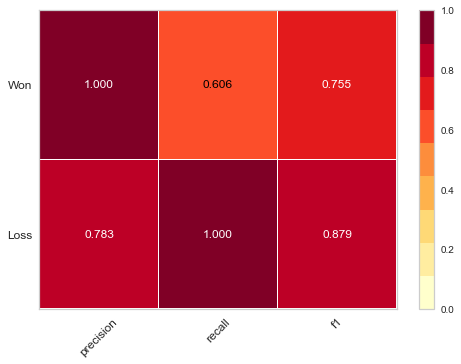

In [52]:
# Instantiate the classification model and visualizer
visualizer_undersampled = ClassificationReport(neigh_undersampled, classes=['Won','Loss'])
visualizer_undersampled.fit(X_train_undersampled, y_train_undersampled) # Fit the training data to the visualizer
visualizer_undersampled.score(X_test_undersampled, y_test_undersampled) # Evaluate the model on the test data
g = visualizer.poof() # Draw/show/poof the data

In [53]:
scaler = StandardScaler()
knn_classifier = KNeighborsClassifier(n_neighbors=5)

pipeline = make_pipeline(scaler, knn_classifier)
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
knn_cv_results_undersampled = cross_val_score(pipeline, X_undersampled, y_undersampled, cv=kf, scoring="accuracy", n_jobs=-1)

print(knn_cv_results_undersampled)
print("Mean: ", knn_cv_results_undersampled.mean())

[0.95  0.95  0.95  0.85  0.975 0.875 0.925 0.95  0.875 0.975]
Mean:  0.9275


### Balansirani (upsampling)

In [54]:
#create object of the lassifier
neigh_upsampled = KNeighborsClassifier(n_neighbors=2)
#Train the algorithm
neigh_upsampled.fit(X_train_upsampled, y_train_upsampled)
# predict the response
pred = neigh_upsampled.predict(X_test_upsampled)
# evaluate accuracy
print ("KNeighbors accuracy score : ",accuracy_score(y_test_upsampled, pred))

KNeighbors accuracy score :  0.9296875


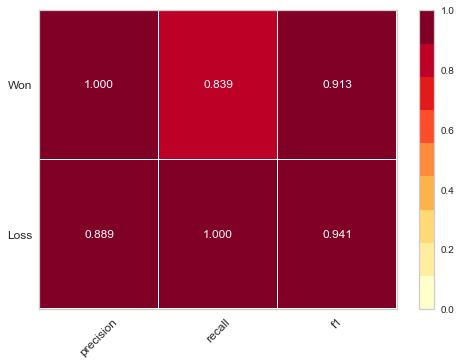

In [55]:
# Instantiate the classification model and visualizer
visualizer_upsampled = ClassificationReport(neigh_upsampled, classes=['Won','Loss'])
visualizer_upsampled.fit(X_train_upsampled, y_train_upsampled) # Fit the training data to the visualizer
visualizer_upsampled.score(X_test_upsampled, y_test_upsampled) # Evaluate the model on the test data
g = visualizer.poof() # Draw/show/poof the data

In [56]:
# Kros validacija
scaler = StandardScaler()
knn_classifier = KNeighborsClassifier(n_neighbors=5) # 3

pipeline = make_pipeline(scaler, knn_classifier)
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
knn_cv_results_upsampled = cross_val_score(pipeline, X_upsampled, y_upsampled, cv=kf, scoring="accuracy", n_jobs=-1)

print(knn_cv_results_upsampled)
print("Mean: ", knn_cv_results_upsampled.mean())

[0.90625  0.984375 0.953125 0.96875  0.96875  0.953125 0.9375   0.96875
 0.90625  0.921875]
Mean:  0.946875


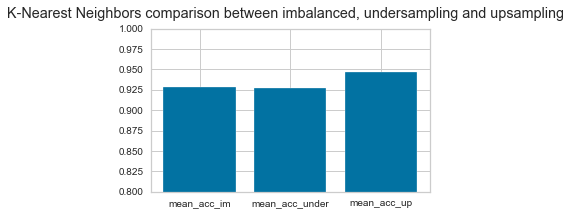

In [57]:
### Kros validacija, poredjenje 
plt.figure(figsize=(5, 3))
plt.ylim(0.8, 1.00)
plt.bar(['mean_acc_im', 'mean_acc_under', 'mean_acc_up'], [knn_cv_results_imbalanced.mean(), knn_cv_results_undersampled.mean(), knn_cv_results_upsampled.mean()])
plt.suptitle('K-Nearest Neighbors comparison between imbalanced, undersampling and upsampling')
plt.show()

## Naive Bayes

### Nebalansirani

In [58]:
# import the necessary module
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
#create an object of the type GaussianNB
gnb = GaussianNB()
#train the algorithm on training data and predict using the testing data
pred = gnb.fit(X_train_imbalanced, y_train_imbalanced).predict(X_test_imbalanced)
#print(pred.tolist())
#print the accuracy score of the model
print("Naive-Bayes accuracy : ",accuracy_score(y_test_imbalanced, pred, normalize = True))

Naive-Bayes accuracy :  0.8942307692307693


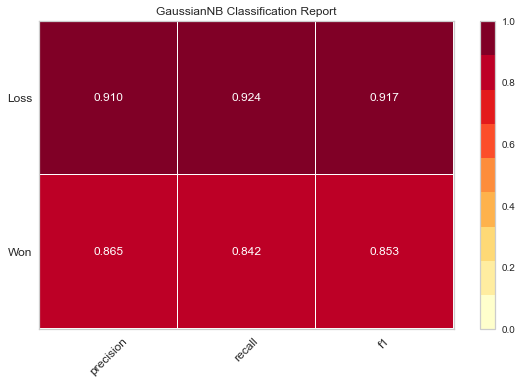

In [59]:
from yellowbrick.classifier import ClassificationReport
# Instantiate the classification model and visualizer
visualizer = ClassificationReport(gnb, classes=['Won','Loss'])
visualizer.fit(X_train_imbalanced, y_train_imbalanced) # Fit the training data to the visualizer
visualizer.score(X_test_imbalanced, y_test_imbalanced) # Evaluate the model on the test data
g = visualizer.poof() # Draw/show/poof the data

In [60]:
#Kros validacija
scaler = StandardScaler()
nb_model = GaussianNB()

# create a pipeline that standardizes, that runs Naive bayes
pipeline = make_pipeline(scaler, nb_model)
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
nb_cv_results_imbalanced = cross_val_score(pipeline, X_imbalanced, y_imbalanced, cv=kf, scoring="accuracy", n_jobs=-1)

print(nb_cv_results_imbalanced)
print("Mean: ", nb_cv_results_imbalanced.mean())

[0.84615385 0.90384615 0.86538462 0.86538462 0.88461538 0.90384615
 0.90384615 0.88461538 0.90384615 0.96153846]
Mean:  0.8923076923076924


### Balansirani (underseampling)

In [61]:
#create an object of the type GaussianNB
gnb_underseampling = GaussianNB()
#train the algorithm on training data and predict using the testing data
pred = gnb_underseampling.fit(X_train_undersampled, y_train_undersampled).predict(X_test_undersampled)
#print(pred.tolist())
#print the accuracy score of the model
print("Naive-Bayes accuracy : ",accuracy_score(y_test_undersampled, pred, normalize = True))

Naive-Bayes accuracy :  0.9125


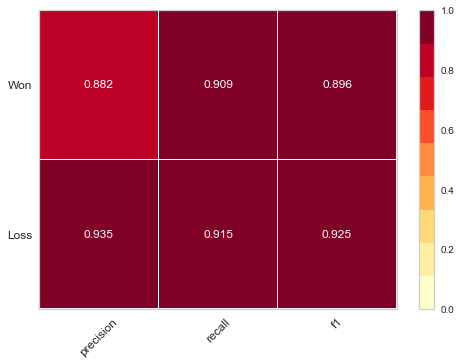

In [62]:
from yellowbrick.classifier import ClassificationReport
# Instantiate the classification model and visualizer
visualizer_undesampled = ClassificationReport(gnb_underseampling, classes=['Won','Loss'])
visualizer_undesampled.fit(X_train_undersampled, y_train_undersampled) # Fit the training data to the visualizer
visualizer_undesampled.score(X_test_undersampled, y_test_undersampled) # Evaluate the model on the test data
g = visualizer.poof() # Draw/show/poof the data

In [63]:
scaler = StandardScaler()
nb_model = GaussianNB()

# create a pipeline that standardizes, that runs Naive bayes
pipeline = make_pipeline(scaler, nb_model)
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
nb_cv_results_undersampled = cross_val_score(pipeline, X_undersampled, y_undersampled, cv=kf, scoring="accuracy", n_jobs=-1)

print(nb_cv_results_undersampled)
print("Mean: ", nb_cv_results_undersampled.mean())

[0.95  0.95  0.9   0.775 0.85  0.925 0.95  0.95  0.825 0.8  ]
Mean:  0.8875


### Balansirani (upseampling)

In [64]:
#create an object of the type GaussianNB
gnb_upsampling = GaussianNB()
#train the algorithm on training data and predict using the testing data
pred = gnb_upsampling.fit(X_train_upsampled, y_train_upsampled).predict(X_test_upsampled)
#print(pred.tolist())
#print the accuracy score of the model
print("Naive-Bayes accuracy : ",accuracy_score(y_test_upsampled, pred, normalize = True))

Naive-Bayes accuracy :  0.8671875


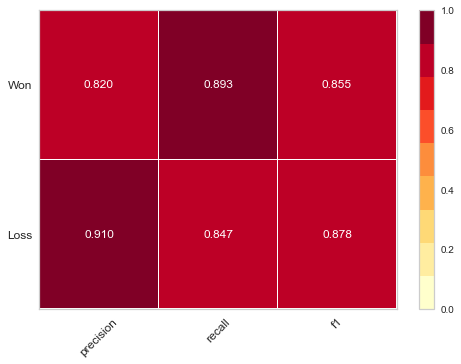

In [65]:
from yellowbrick.classifier import ClassificationReport
# Instantiate the classification model and visualizer
visualizer_upsampled = ClassificationReport(gnb_upsampling, classes=['Won','Loss'])
visualizer_upsampled.fit(X_train_upsampled, y_train_upsampled) # Fit the training data to the visualizer
visualizer_upsampled.score(X_test_upsampled, y_test_upsampled) # Evaluate the model on the test data
g = visualizer.poof() # Draw/show/poof the data

In [66]:
scaler = StandardScaler()
nb_model = GaussianNB()

# create a pipeline that standardizes, that runs Naive bayes
pipeline = make_pipeline(scaler, nb_model)
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
nb_cv_results_upsampled = cross_val_score(pipeline, X_upsampled, y_upsampled, cv=kf, scoring="accuracy", n_jobs=-1)

print(nb_cv_results_upsampled)
print("Mean: ", nb_cv_results_upsampled.mean())

[0.8125   0.875    0.9375   0.828125 0.875    0.859375 0.921875 0.921875
 0.875    0.90625 ]
Mean:  0.88125


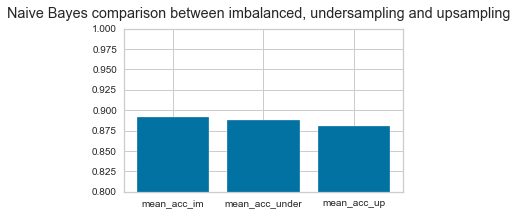

In [67]:
### Kros validacija, poredjenje 
plt.figure(figsize=(5, 3))
plt.ylim(0.8, 1.00)
plt.bar(['mean_acc_im', 'mean_acc_under', 'mean_acc_up'], [nb_cv_results_imbalanced.mean(), nb_cv_results_undersampled.mean(), nb_cv_results_upsampled.mean()])
plt.suptitle('Naive Bayes comparison between imbalanced, undersampling and upsampling')
plt.show()

## PITANJA 14.12.2022

Da odradimo kros validaciju za jos algoritama, pa da na osnovu najboljih odaberemo 2,3 koja daju najbolje vrednosti i sa njima radimo dublju analizu?

In [68]:
# Ukljuciti analizu f1 mere!!

### Logistic regression


In [69]:
from sklearn.linear_model import LogisticRegression

In [70]:
#nebalansirano

scaler = StandardScaler()
lr_classifier = LogisticRegression()

pipeline = make_pipeline(scaler, lr_classifier)
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
lr_cv_results_imbalanced = cross_val_score(pipeline, X_imbalanced, y_imbalanced, cv=kf, scoring="accuracy", n_jobs=-1)

print(lr_cv_results_imbalanced)
print("Mean: ", lr_cv_results_imbalanced.mean())

[0.86538462 0.92307692 0.90384615 0.84615385 0.96153846 0.88461538
 0.98076923 0.92307692 0.96153846 0.98076923]
Mean:  0.923076923076923


In [71]:
#underseampling

scaler = StandardScaler()
lr_classifier = LogisticRegression()

pipeline = make_pipeline(scaler, lr_classifier)
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
lr_cv_results_undersampled = cross_val_score(pipeline, X_undersampled, y_undersampled, cv=kf, scoring="accuracy", n_jobs=-1)

print(lr_cv_results_undersampled)
print("Mean: ", lr_cv_results_undersampled.mean())

[0.925 0.975 0.95  0.925 0.925 0.85  0.975 0.925 0.875 0.975]
Mean:  0.9299999999999999


In [72]:
# upsampling

scaler = StandardScaler()
lr_classifier = LogisticRegression()

pipeline = make_pipeline(scaler, lr_classifier)
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
lr_cv_results_upsampled = cross_val_score(pipeline, X_upsampled, y_upsampled, cv=kf, scoring="accuracy", n_jobs=-1)

print(lr_cv_results_upsampled)
print("Mean: ", lr_cv_results_upsampled.mean())

[0.890625 0.921875 0.953125 0.890625 0.9375   0.953125 0.9375   0.96875
 0.84375  0.953125]
Mean:  0.925


### poredjenje 

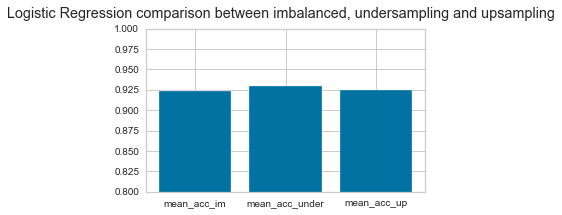

In [73]:
plt.figure(figsize=(5, 3))
plt.ylim(0.8, 1.00)
plt.bar(['mean_acc_im', 'mean_acc_under', 'mean_acc_up'], [lr_cv_results_imbalanced.mean(), lr_cv_results_undersampled.mean(), lr_cv_results_upsampled.mean()])
plt.suptitle('Logistic Regression comparison between imbalanced, undersampling and upsampling')
plt.show()

### Decision tree

In [74]:
#nebalansirano

scaler = StandardScaler()
dt_classifier = DecisionTreeClassifier(random_state=0)

pipeline = make_pipeline(scaler, dt_classifier)
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
dt_cv_results_imbalanced = cross_val_score(pipeline, X_imbalanced, y_imbalanced, cv=kf, scoring="accuracy", n_jobs=-1)

print(dt_cv_results_imbalanced)
print("Mean: ", dt_cv_results_imbalanced.mean())

[0.92307692 0.98076923 0.98076923 0.94230769 0.94230769 0.90384615
 1.         0.98076923 0.88461538 0.98076923]
Mean:  0.9519230769230769


In [75]:
# undersampling

scaler = StandardScaler()
dt_classifier = DecisionTreeClassifier(random_state=0)

pipeline = make_pipeline(scaler, dt_classifier)
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
dt_cv_results_undersampled = cross_val_score(pipeline, X_undersampled, y_undersampled, cv=kf, scoring="accuracy", n_jobs=-1)

print(dt_cv_results_undersampled)
print("Mean: ", dt_cv_results_undersampled.mean())

[0.975 0.975 0.95  0.925 0.925 0.9   0.95  0.975 0.975 0.975]
Mean:  0.9525


In [76]:
# upsampling

scaler = StandardScaler()
dt_classifier = DecisionTreeClassifier(random_state=0)

pipeline = make_pipeline(scaler, dt_classifier)
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
dt_cv_results_upsampled = cross_val_score(pipeline, X_upsampled, y_upsampled, cv=kf, scoring="accuracy", n_jobs=-1)

print(dt_cv_results_upsampled)
print("Mean: ", dt_cv_results_upsampled.mean())

[0.953125 1.       1.       0.953125 0.984375 0.96875  0.984375 0.984375
 0.953125 1.      ]
Mean:  0.978125


#### Poredjenje Decision tree

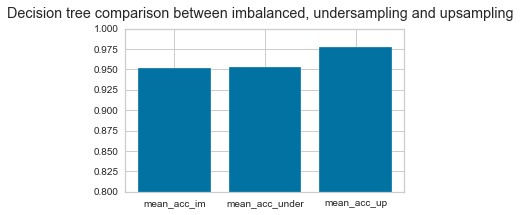

In [77]:
plt.figure(figsize=(5, 3))
plt.ylim(0.8, 1.00)
plt.bar(['mean_acc_im', 'mean_acc_under', 'mean_acc_up'], [dt_cv_results_imbalanced.mean(), dt_cv_results_undersampled.mean(), dt_cv_results_upsampled.mean()])
plt.suptitle('Decision tree comparison between imbalanced, undersampling and upsampling')
plt.show()

### Random forest

In [78]:
#nebalansirsano

scaler = StandardScaler()
rf_model = RandomForestClassifier()

pipeline = make_pipeline(scaler, rf_model)
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
rf_cv_results_imbalanced = cross_val_score(pipeline, X_imbalanced, y_imbalanced, cv=kf, scoring="accuracy", n_jobs=-1)

print(rf_cv_results_imbalanced)
print("Mean: ", rf_cv_results_imbalanced.mean())

[0.96153846 0.98076923 0.98076923 0.96153846 0.96153846 0.96153846
 1.         1.         0.98076923 1.        ]
Mean:  0.9788461538461538


In [79]:
#undersampling

scaler = StandardScaler()
rf_model = RandomForestClassifier()

pipeline = make_pipeline(scaler, rf_model)
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
rf_cv_results_undersampled = cross_val_score(pipeline, X_undersampled, y_undersampled, cv=kf, scoring="accuracy", n_jobs=-1)

print(rf_cv_results_undersampled)
print("Mean: ", rf_cv_results_undersampled.mean())

[0.975 0.975 0.95  0.925 0.975 0.9   1.    0.975 0.975 1.   ]
Mean:  0.9650000000000001


In [80]:
#upsampling

scaler = StandardScaler()
rf_model = RandomForestClassifier()

pipeline = make_pipeline(scaler, rf_model)
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
rf_cv_results_upsampled = cross_val_score(pipeline, X_upsampled, y_upsampled, cv=kf, scoring="accuracy", n_jobs=-1)

print(rf_cv_results_upsampled)
print("Mean: ", rf_cv_results_upsampled.mean())

[0.96875  1.       1.       0.953125 0.984375 0.984375 0.984375 1.
 0.9375   1.      ]
Mean:  0.98125


#### Poredjenje Random Forest

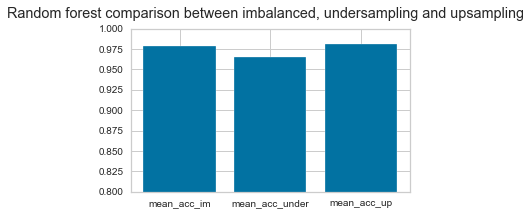

In [81]:
plt.figure(figsize=(5, 3))
plt.ylim(0.8, 1.00)
plt.bar(['mean_acc_im', 'mean_acc_under', 'mean_acc_up'], [rf_cv_results_imbalanced.mean(), rf_cv_results_undersampled.mean(), rf_cv_results_upsampled.mean()])
plt.suptitle('Random forest comparison between imbalanced, undersampling and upsampling')
plt.show()

### Gradient Boost

In [82]:
#imbalanced

scaler = StandardScaler()
gb_model = GradientBoostingClassifier(learning_rate=0.1)

pipeline = make_pipeline(scaler, gb_model)
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
gb_cv_results_imbalanced = cross_val_score(pipeline, X_imbalanced, y_imbalanced, cv=kf, scoring="accuracy", n_jobs=-1)

print(gb_cv_results_imbalanced)
print("Mean: ", gb_cv_results_imbalanced.mean())

[0.96153846 0.98076923 0.98076923 0.92307692 0.94230769 0.96153846
 0.98076923 1.         0.96153846 0.98076923]
Mean:  0.9673076923076922


In [83]:
#undersampling

scaler = StandardScaler()
gb_model = GradientBoostingClassifier(learning_rate=0.1)

pipeline = make_pipeline(scaler, gb_model)
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
gb_cv_results_undersampled = cross_val_score(pipeline, X_undersampled, y_undersampled, cv=kf, scoring="accuracy", n_jobs=-1)

print(gb_cv_results_undersampled)
print("Mean: ", gb_cv_results_undersampled.mean())

[0.975 0.975 0.95  0.95  0.975 0.95  0.95  0.975 0.925 1.   ]
Mean:  0.9625


In [84]:
#upsampling

scaler = StandardScaler()
gb_model = GradientBoostingClassifier(learning_rate=0.1)

pipeline = make_pipeline(scaler, gb_model)
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
gb_cv_results_upsampled = cross_val_score(pipeline, X_upsampled, y_upsampled, cv=kf, scoring="accuracy", n_jobs=-1)

print(gb_cv_results_upsampled)
print("Mean: ", gb_cv_results_upsampled.mean())

[0.96875  1.       0.984375 0.953125 0.984375 0.96875  0.984375 1.
 0.9375   1.      ]
Mean:  0.978125


#### Poredjenje Gradient Boost

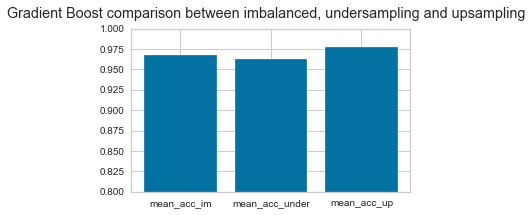

In [85]:
plt.figure(figsize=(5, 3))
plt.ylim(0.8, 1.00)
plt.bar(['mean_acc_im', 'mean_acc_under', 'mean_acc_up'], [gb_cv_results_imbalanced.mean(), gb_cv_results_undersampled.mean(), gb_cv_results_upsampled.mean()])
plt.suptitle('Gradient Boost comparison between imbalanced, undersampling and upsampling')
plt.show()

### DummyClassifier

In [86]:
#imbalanced

scaler = StandardScaler()
dummy = DummyClassifier(strategy='stratified', random_state=1)

pipeline = make_pipeline(scaler, dummy)
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
dummy_cv_results_imbalanced = cross_val_score(pipeline, X_imbalanced, y_imbalanced, cv=kf, scoring="accuracy", n_jobs=-1)

print(dummy_cv_results_imbalanced)
print("Mean: ", dummy_cv_results_imbalanced.mean())

[0.57692308 0.57692308 0.57692308 0.65384615 0.5        0.53846154
 0.5        0.53846154 0.65384615 0.57692308]
Mean:  0.5692307692307692


In [87]:
#undersampling

scaler = StandardScaler()
dummy = DummyClassifier(strategy='stratified', random_state=1)

pipeline = make_pipeline(scaler, dummy)
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
dummy_cv_results_undersampled = cross_val_score(pipeline, X_undersampled, y_undersampled, cv=kf, scoring="accuracy", n_jobs=-1)

print(dummy_cv_results_undersampled)
print("Mean: ", dummy_cv_results_undersampled.mean())

[0.65 0.65 0.65 0.65 0.65 0.65 0.65 0.65 0.65 0.65]
Mean:  0.6500000000000001


In [88]:
#upsampling

scaler = StandardScaler()
dummy = DummyClassifier(strategy='stratified', random_state=1)

pipeline = make_pipeline(scaler, dummy)
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
dummy_cv_results_upsampled = cross_val_score(pipeline, X_upsampled, y_upsampled, cv=kf, scoring="accuracy", n_jobs=-1)

print(dummy_cv_results_upsampled)
print("Mean: ", dummy_cv_results_upsampled.mean())

[0.546875 0.546875 0.546875 0.546875 0.546875 0.546875 0.546875 0.546875
 0.546875 0.546875]
Mean:  0.546875


### Poredjenje algoritama

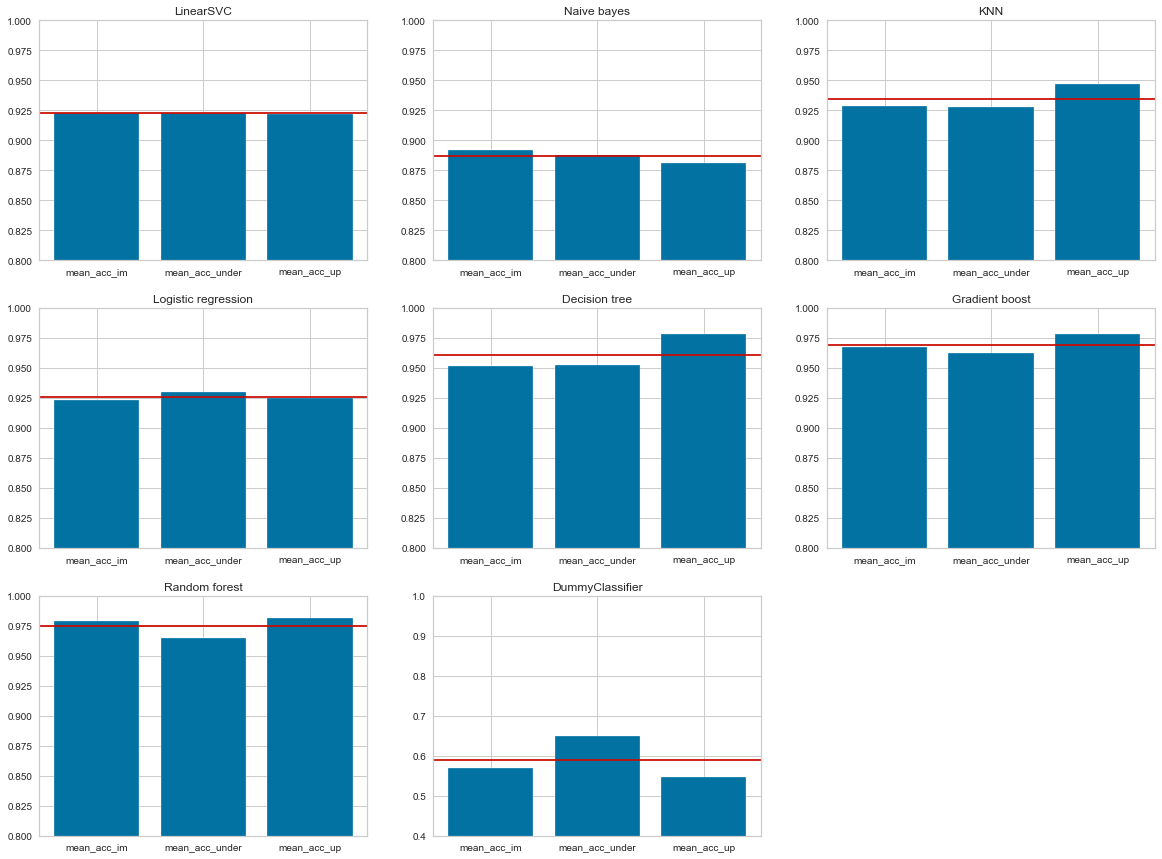

In [89]:
from statistics import mean

plt.figure(figsize=(20, 15))
plt.subplot(331)
plt.gca().set_title('LinearSVC')
plt.ylim(0.8, 1.00)
plt.bar(['mean_acc_im', 'mean_acc_under', 'mean_acc_up'], [svc_cv_results_imbalanced.mean(), svc_cv_results_undersampled.mean(), svc_cv_results_upsampled.mean()])
plt.axhline(y = mean([svc_cv_results_imbalanced.mean(), svc_cv_results_undersampled.mean(), svc_cv_results_upsampled.mean()]), color = 'r', linestyle = '-')
plt.subplot(332)
plt.gca().set_title('Naive bayes')
plt.ylim(0.8, 1.00)
plt.bar(['mean_acc_im', 'mean_acc_under', 'mean_acc_up'], [nb_cv_results_imbalanced.mean(), nb_cv_results_undersampled.mean(), nb_cv_results_upsampled.mean()])
plt.axhline(y = mean([nb_cv_results_imbalanced.mean(), nb_cv_results_undersampled.mean(), nb_cv_results_upsampled.mean()]), color = 'r', linestyle = '-')
plt.subplot(333)
plt.gca().set_title('KNN')
plt.ylim(0.8, 1.00)
plt.bar(['mean_acc_im', 'mean_acc_under', 'mean_acc_up'], [knn_cv_results_imbalanced.mean(), knn_cv_results_undersampled.mean(), knn_cv_results_upsampled.mean()])
plt.axhline(y = mean([knn_cv_results_imbalanced.mean(), knn_cv_results_undersampled.mean(), knn_cv_results_upsampled.mean()]), color = 'r', linestyle = '-')

plt.subplot(334)
plt.gca().set_title('Logistic regression')
plt.ylim(0.8, 1.00)
plt.bar(['mean_acc_im', 'mean_acc_under', 'mean_acc_up'], [lr_cv_results_imbalanced.mean(), lr_cv_results_undersampled.mean(), lr_cv_results_upsampled.mean()])
plt.axhline(y = mean([lr_cv_results_imbalanced.mean(), lr_cv_results_undersampled.mean(), lr_cv_results_upsampled.mean()]), color = 'r', linestyle = '-')
plt.subplot(335)
plt.gca().set_title('Decision tree')
plt.ylim(0.8, 1.00)
plt.bar(['mean_acc_im', 'mean_acc_under', 'mean_acc_up'], [dt_cv_results_imbalanced.mean(), dt_cv_results_undersampled.mean(), dt_cv_results_upsampled.mean()])
plt.axhline(y = mean([dt_cv_results_imbalanced.mean(), dt_cv_results_undersampled.mean(), dt_cv_results_upsampled.mean()]), color = 'r', linestyle = '-')
plt.subplot(336)
plt.gca().set_title('Gradient boost')
plt.ylim(0.8, 1.00)
plt.bar(['mean_acc_im', 'mean_acc_under', 'mean_acc_up'], [gb_cv_results_imbalanced.mean(), gb_cv_results_undersampled.mean(), gb_cv_results_upsampled.mean()])
plt.axhline(y = mean([gb_cv_results_imbalanced.mean(), gb_cv_results_undersampled.mean(), gb_cv_results_upsampled.mean()]), color = 'r', linestyle = '-')

plt.subplot(337)
plt.gca().set_title('Random forest')
plt.ylim(0.8, 1.00)
plt.bar(['mean_acc_im', 'mean_acc_under', 'mean_acc_up'], [rf_cv_results_imbalanced.mean(), rf_cv_results_undersampled.mean(), rf_cv_results_upsampled.mean()])
plt.axhline(y = mean([rf_cv_results_imbalanced.mean(), rf_cv_results_undersampled.mean(), rf_cv_results_upsampled.mean()]), color = 'r', linestyle = '-')
plt.subplot(338)
plt.gca().set_title('DummyClassifier')
plt.ylim(0.4, 1.00)
plt.bar(['mean_acc_im', 'mean_acc_under', 'mean_acc_up'], [dummy_cv_results_imbalanced.mean(), dummy_cv_results_undersampled.mean(), dummy_cv_results_upsampled.mean()])
plt.axhline(y = mean([dummy_cv_results_imbalanced.mean(), dummy_cv_results_undersampled.mean(), dummy_cv_results_upsampled.mean()]), color = 'r', linestyle = '-')

plt.show()

### U nastavku bice detaljnije obradjeni algoritmi: SVC i Gradient Boost

## SVC

Accuracy :  0.5546875
F1 Score:  0.6013986013986014
Precision:  0.4942528735632184
Recall:  0.7678571428571429
Confuse matrix:
[[28 44]
 [13 43]]
True positive:  43
False positive:  44
True negative:  28
False negative:  13
Sensitivity:  0.7678571428571429
Specificity:  0.3888888888888889

SVC params:
{'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}


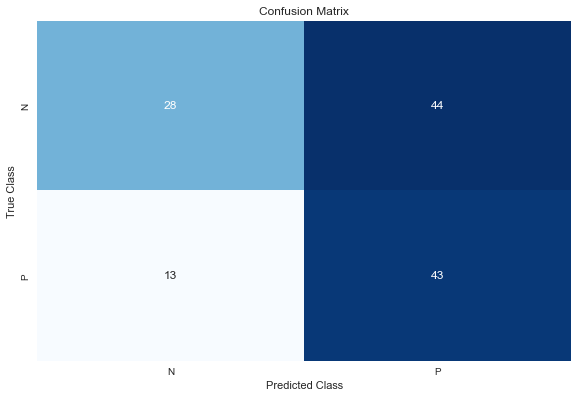

In [122]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, recall_score, precision_score, roc_curve, auc
from sklearn.svm import SVC


svc_model = SVC()

params = svc_model.get_params()

svc_model.fit(X_train_upsampled, y_train_upsampled)
svc_prediction_upsampled = svc_model.predict(X_test_upsampled)

# model evaluation
evaluate_model(y_test_upsampled, svc_prediction_upsampled)

print()
print("SVC params:")
print(params)

# Create confusion matrix
matrix = confusion_matrix(y_test_upsampled, svc_prediction_upsampled)

plot_conf_matrix(matrix)

Accuracy :  0.8984375
F1 Score:  0.8907563025210083
Precision:  0.8412698412698413
Recall:  0.9464285714285714
Confuse matrix:
[[62 10]
 [ 3 53]]
True positive:  53
False positive:  10
True negative:  62
False negative:  3
Sensitivity:  0.9464285714285714
Specificity:  0.8611111111111112

SVC params:
{'C': 1.0, 'class_weight': None, 'dual': True, 'fit_intercept': True, 'intercept_scaling': 1, 'loss': 'squared_hinge', 'max_iter': 1000, 'multi_class': 'ovr', 'penalty': 'l2', 'random_state': None, 'tol': 0.0001, 'verbose': 0}


c:\users\nikol\appdata\local\programs\python\python38\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


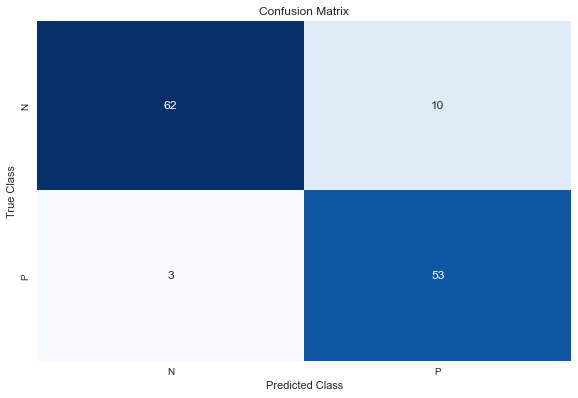

In [124]:
svc_model = LinearSVC()

params = svc_model.get_params()

svc_model.fit(X_train_upsampled, y_train_upsampled)
svc_prediction_upsampled = svc_model.predict(X_test_upsampled)

# model evaluation
evaluate_model(y_test_upsampled, svc_prediction_upsampled)

print()
print("SVC params:")
print(params)

# Create confusion matrix
matrix = confusion_matrix(y_test_upsampled, svc_prediction_upsampled)

plot_conf_matrix(matrix)

### Podesavanje hiperparametara koriscenjem nasumicne pretrage


### The most critical hyperparameters for SVM are kernel, C, and gamma.
#### kernel function transforms the training dataset into higher dimensions to make it linearly separatable. The default kernel function for the python implementation of the support vector classifier is the Radial Basis Function, which is usually referred to as rbf. 
#### The kernel function can take other values such as linear, poly, rbf, sigmoid, precomputed, or callable.

#### C is the l2 regularization parameter. The value of C is inversely proportional to the strength of the regularization.
#### When C is small, the penalty for misclassification is small, and the strength of the regularization is large. So a decision boundary with a large margin will be selected.
#### When C is large, the penalty for misclassification is large, and the strength of the regularization is small. A decision boundary with a small margin will be selected to reduce misclassifications.

#### gamma is the kernel coefficient for rbf, poly, and sigmoid. It can be seen as the inverse of the support vector influence radius. The gamma parameter highly impacts the model performance. Gamma can take the value of scale, auto, or a float value. The default value for the python sklearn implementation is scale since version 0.22.
#### When gamma is small, the support vector influence radius is high. If the gamma value is too small, the radius of the support vectors covers the whole training dataset, and the pattern of the data will not be captured.
#### When gamma is large, the support vector influence radius is low. If the gamma value is too large, the support vector radius is too small to utilize C to prevent overfitting.

In [125]:
# Check default values
svc = SVC()
params = svc.get_params()
params_df = pd.DataFrame(params, index=[0])
params_df.T

,0
C,1.0
break_ties,False
cache_size,200
class_weight,None
coef0,0.0
decision_function_shape,ovr
degree,3
gamma,scale
kernel,rbf
max_iter,-1


In [126]:
# Check default values
svc = LinearSVC()
params = svc.get_params()
params_df = pd.DataFrame(params, index=[0])
params_df.T

,0
C,1.0
class_weight,None
dual,True
fit_intercept,True
intercept_scaling,1
loss,squared_hinge
max_iter,1000
multi_class,ovr
penalty,l2
random_state,None


In [131]:
# List of C values
C_range = np.logspace(-10, 10, 21)
print(f'The list of values for C are {C_range}')
# List of gamma values
gamma_range = np.logspace(-10, 10, 21)
print(f'The list of values for gamma are {gamma_range}')

# Define the search space
param_grid = { 
    # Regularization parameter.
    "C": C_range
    }
# Set up score
scoring = ['accuracy']
# Set up the k-fold cross-validation
kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)
# Define random search
random_search = RandomizedSearchCV(estimator=svc, 
                           param_distributions=param_grid, 
                           n_iter=100,
                           scoring=scoring, 
                           refit='accuracy', 
                           n_jobs=-1, 
                           cv=kfold, 
                           verbose=0)
# Fit grid search
random_result = random_search.fit(X_train_upsampled, y_train_upsampled)
# Print grid search summary
random_result

The list of values for C are [1.e-10 1.e-09 1.e-08 1.e-07 1.e-06 1.e-05 1.e-04 1.e-03 1.e-02 1.e-01
 1.e+00 1.e+01 1.e+02 1.e+03 1.e+04 1.e+05 1.e+06 1.e+07 1.e+08 1.e+09
 1.e+10]
The list of values for gamma are [1.e-10 1.e-09 1.e-08 1.e-07 1.e-06 1.e-05 1.e-04 1.e-03 1.e-02 1.e-01
 1.e+00 1.e+01 1.e+02 1.e+03 1.e+04 1.e+05 1.e+06 1.e+07 1.e+08 1.e+09
 1.e+10]


c:\users\nikol\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_search.py:292: UserWarning: The total space of parameters 21 is smaller than n_iter=100. Running 21 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
c:\users\nikol\appdata\local\programs\python\python38\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


RandomizedSearchCV(cv=StratifiedKFold(n_splits=3, random_state=0, shuffle=True),
                   estimator=LinearSVC(), n_iter=100, n_jobs=-1,
                   param_distributions={'C': array([1.e-10, 1.e-09, 1.e-08, 1.e-07, 1.e-06, 1.e-05, 1.e-04, 1.e-03,
       1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05,
       1.e+06, 1.e+07, 1.e+08, 1.e+09, 1.e+10])},
                   refit='accuracy', scoring=['accuracy'])

In [163]:
# List of C values
C_range = np.logspace(-10, 10, 21)
print(f'The list of values for C are {C_range}')
# List of gamma values
gamma_range = np.logspace(-10, 10, 21)
print(f'The list of values for gamma are {gamma_range}')

# Define the search space
param_grid = { 
    # Regularization parameter.
    "C": C_range
    }
# Set up score
scoring = ['accuracy']
# Set up the k-fold cross-validation
kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)
# Define random search
random_search = RandomizedSearchCV(estimator=svc, 
                           param_distributions=param_grid, 
                           n_iter=100,
                           scoring=scoring, 
                           refit='accuracy', 
                           n_jobs=-1, 
                           cv=kfold, 
                           verbose=0)
# Fit grid search
random_result = random_search.fit(X_train_undersampled, y_train_undersampled)
# Print grid search summary
random_result

The list of values for C are [1.e-10 1.e-09 1.e-08 1.e-07 1.e-06 1.e-05 1.e-04 1.e-03 1.e-02 1.e-01
 1.e+00 1.e+01 1.e+02 1.e+03 1.e+04 1.e+05 1.e+06 1.e+07 1.e+08 1.e+09
 1.e+10]
The list of values for gamma are [1.e-10 1.e-09 1.e-08 1.e-07 1.e-06 1.e-05 1.e-04 1.e-03 1.e-02 1.e-01
 1.e+00 1.e+01 1.e+02 1.e+03 1.e+04 1.e+05 1.e+06 1.e+07 1.e+08 1.e+09
 1.e+10]


c:\users\nikol\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_search.py:292: UserWarning: The total space of parameters 21 is smaller than n_iter=100. Running 21 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
c:\users\nikol\appdata\local\programs\python\python38\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


RandomizedSearchCV(cv=StratifiedKFold(n_splits=3, random_state=0, shuffle=True),
                   estimator=LinearSVC(), n_iter=100, n_jobs=-1,
                   param_distributions={'C': array([1.e-10, 1.e-09, 1.e-08, 1.e-07, 1.e-06, 1.e-05, 1.e-04, 1.e-03,
       1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05,
       1.e+06, 1.e+07, 1.e+08, 1.e+09, 1.e+10])},
                   refit='accuracy', scoring=['accuracy'])

In [181]:
# Print the best accuracy score for the training dataset
print(f'The best accuracy score for the training dataset is {random_result.best_score_:.4f}')
# Print the hyperparameters for the best score
print(f'The best hyperparameters are {random_result.best_params_}')
# Print the best accuracy score for the testing dataset
print(f'The accuracy score for the testing dataset is {random_search.score(X_test_upsampled, y_test_upsampled):.4f}')

The best accuracy score for the training dataset is 0.9281
The best hyperparameters are {'C': 0.1}
The accuracy score for the testing dataset is 0.9219


### Hyperparameter Tuning Using Grid Search

In [180]:
# List of C values
C_range = np.logspace(-1, 1, 3)
print(f'The list of values for C are {C_range}')
# Define the search space
param_grid = { 
    # Regularization parameter.
    "C": C_range,
    }
# Set up score
scoring = ['accuracy']
# Set up the k-fold cross-validation
kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)

# Define grid search
grid_search = GridSearchCV(estimator=svc, 
                           param_grid=param_grid, 
                           scoring=scoring, 
                           refit='accuracy', 
                           n_jobs=-1, 
                           cv=kfold, 
                           verbose=0)
# Fit grid search
grid_result = grid_search.fit(X_train_upsampled, y_train_upsampled)
# Print grid search summary
grid_result


# Print the best accuracy score for the training dataset
print(f'The best accuracy score for the training dataset is {grid_result.best_score_:.4f}')
# Print the hyperparameters for the best score
print(f'The best hyperparameters are {grid_result.best_params_}')
# Print the best accuracy score for the testing dataset UPSAMPLED
print(f'The accuracy score for the testing dataset is {grid_search.score(X_test_upsampled, y_test_upsampled):.4f}')


The list of values for C are [ 0.1  1.  10. ]
The best accuracy score for the training dataset is 0.9043
The best hyperparameters are {'C': 0.1}
The accuracy score for the testing dataset is 0.9297


c:\users\nikol\appdata\local\programs\python\python38\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


### Hyperparameter Tuning Using Bayesian Optimization

In [153]:
from hyperopt import tpe, STATUS_OK, Trials, hp, fmin, STATUS_OK, space_eval
# Space
space = {
    'C' : hp.choice('C', C_range),
}
# Set up the k-fold cross-validation
kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)
# Objective function
def objective(params):
    
    svc = LinearSVC(**params)
    scores = cross_val_score(svc, X_train_upsampled, y_train_upsampled, cv=kfold, scoring='accuracy', n_jobs=-1)
    # Extract the best score
    best_score = max(scores)
    # Loss must be minimized
    loss = - best_score
    # Dictionary with information for evaluation
    return {'loss': loss, 'params': params, 'status': STATUS_OK}
# Trials to track progress
bayes_trials = Trials()
# Optimize
best = fmin(fn = objective, space = space, algo = tpe.suggest, max_evals = 100, trials = bayes_trials)


100%|█████| 100/100 [00:01<00:00, 54.91trial/s, best loss: -0.9411764705882353]


In [154]:
# Print the index of the best parameters
print(best)
# Print the values of the best parameters
print(space_eval(space, best))

{'C': 0}
{'C': 0.1}


In [179]:
# Train model using the best parameters
svc_bo = LinearSVC(C=space_eval(space, best)['C']).fit(X_train_upsampled,y_train_upsampled)

# Print the best accuracy score for the testing dataset upsampled
print(f'The accuracy score for the testing dataset is {svc_bo.score(X_test_upsampled, y_test_upsampled):.4f}')


The accuracy score for the testing dataset is 0.9297


c:\users\nikol\appdata\local\programs\python\python38\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


## Gradient Boost

Accuracy :  0.984375
F1 Score:  0.9821428571428571
Precision:  0.9821428571428571
Recall:  0.9821428571428571
Confuse matrix:
[[71  1]
 [ 1 55]]
True positive:  55
False positive:  1
True negative:  71
False negative:  1
Sensitivity:  0.9821428571428571
Specificity:  0.9861111111111112

Gradient Boost params:
{'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.1, 'loss': 'deviance', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_iter_no_change': None, 'random_state': None, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}


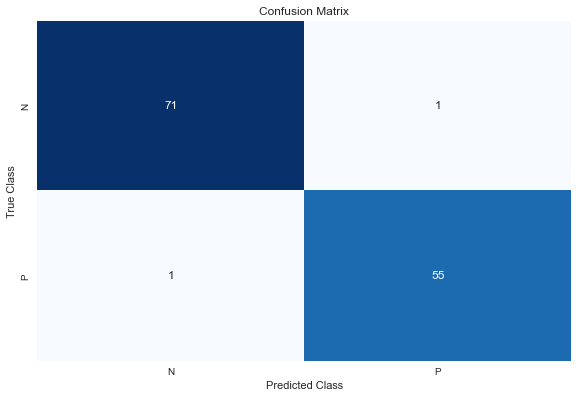

In [92]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, recall_score, precision_score, roc_curve, auc


gb_model = GradientBoostingClassifier()

params = gb_model.get_params()

gb_model.fit(X_train_upsampled, y_train_upsampled)
gb_prediction_upsampled = gb_model.predict(X_test_upsampled)

# model evaluation
evaluate_model(y_test_upsampled, gb_prediction_upsampled)

print()
print("Gradient Boost params:")
print(params)

# Create confusion matrix
matrix = confusion_matrix(y_test_upsampled, gb_prediction_upsampled)

plot_conf_matrix(matrix)

### Podesavanje hiperparametara koriscenjem nasumicne pretrage

Best params:  {'subsample': 0.8, 'n_estimators': 50, 'min_samples_split': 6, 'min_samples_leaf': 9, 'max_features': 5, 'max_depth': 14, 'learning_rate': 0.15}
Best score:  0.9727013135351228

Accuracy :  1.0
F1 Score:  1.0
Precision:  1.0
Recall:  1.0
Confuse matrix:
[[72  0]
 [ 0 56]]
True positive:  56
False positive:  0
True negative:  72
False negative:  0
Sensitivity:  1.0
Specificity:  1.0


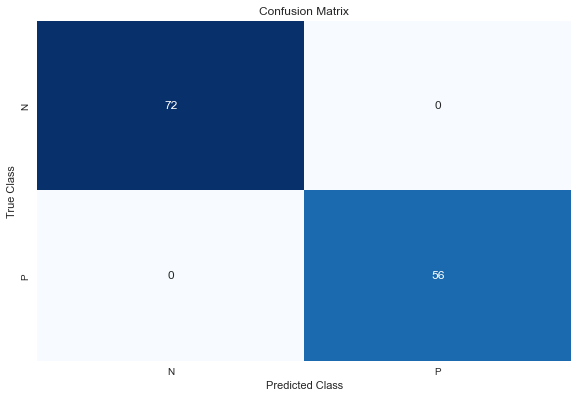

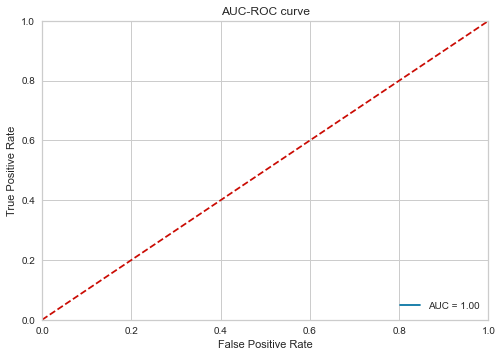

In [94]:
# Create Gradient Boosting
gb_classifier = GradientBoostingClassifier()

# Create hyperparameters values
learning_rate = [0.15, 0.1, 0.05, 0.01, 0.005, 0.001]
n_estimators = [3, 7, 15, 20, 30, 50]
subsample = [0.5, 0.75, 0.8, 0.95, 1.0]

max_depth = uniform(loc=5, scale=20).rvs(10).astype(int)
min_samples_split = uniform(loc=2, scale=60).rvs(15).astype(int)
min_samples_leaf = [1, 3, 5, 7, 9]
max_features = [3, 4, 5, 6, 7, 12]

# Create hyperparameter options
hyperparameters = dict(learning_rate=learning_rate, n_estimators=n_estimators,
                       subsample=subsample, max_depth=max_depth, min_samples_split=min_samples_split,
                      min_samples_leaf=min_samples_leaf, max_features=max_features)

# Create randomized search
randomizedsearch = RandomizedSearchCV(gb_classifier, hyperparameters, random_state=1, 
                                      n_iter=100, cv=5, verbose=0, n_jobs=-1)

# Fit randomized search
best_model = randomizedsearch.fit(X_train_upsampled, y_train_upsampled)
 
print("Best params: ", randomizedsearch.best_params_)
print("Best score: ", randomizedsearch.best_score_)
print()

rs_prediction_upsampled = best_model.predict(X_test_upsampled)

# model evaluation
evaluate_model(y_test_upsampled, rs_prediction_upsampled)

# Create confusion matrix
matrix = confusion_matrix(y_test_upsampled, rs_prediction_upsampled)

plot_conf_matrix(matrix)

auc_roc_plot(y_test_upsampled, rs_prediction_upsampled)

### Efekat velicine dataseta

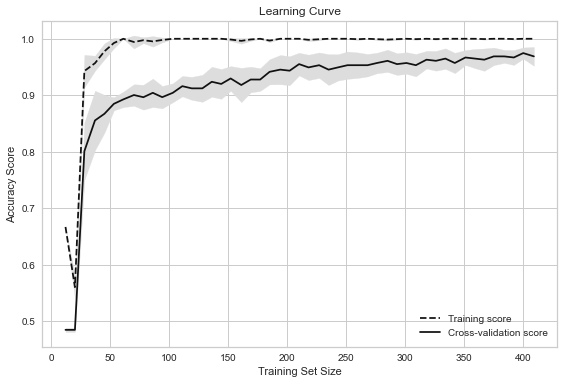

In [95]:
gb_classifier = GradientBoostingClassifier()
gb_classifier.set_params(**best_model.best_estimator_.get_params())

train_sizes, train_scores, test_scores = learning_curve(gb_classifier, X_train_upsampled, y_train_upsampled, cv=5,
    scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.01, 1.0, 50))

# Create means and standard deviations of training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Create means and standard deviations of test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Draw lines
plt.plot(train_sizes, train_mean, '--', color="#111111", label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

# Draw bands
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

# Create plot
plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"),
plt.legend(loc="best")
plt.tight_layout()
plt.show()

### Efekat vrednosti hiperparametara

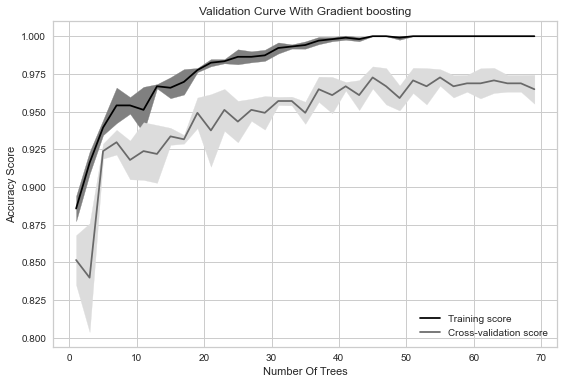

In [96]:
gb_classifier = GradientBoostingClassifier()
gb_classifier.set_params(**best_model.best_estimator_.get_params())

# Create range of values for parameter n_estimators
param_range = np.arange(1, 70, 2)

# Calculate accuracy on training and test set using range of parameter values
train_scores, test_scores = validation_curve(
 # Classifier
 gb_classifier,
 # Feature matrix
 X_train_upsampled,
 # Target vector
 y_train_upsampled,
 # Hyperparameter to examine
 param_name="n_estimators",
 # Range of hyperparameter's values
 param_range=param_range,
 # Number of folds
 cv=3,
 # Performance metric
 scoring="accuracy",
 # Use all computer cores
 n_jobs=-1)

# Calculate mean and standard deviation for training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Calculate mean and standard deviation for test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot mean accuracy scores for training and test sets
plt.plot(param_range, train_mean, label="Training score", color="black")
plt.plot(param_range, test_mean, label="Cross-validation score", color="dimgrey")

# Plot accurancy bands for training and test sets
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color="gray")
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color="gainsboro")

# Create plot
plt.title("Validation Curve With Gradient boosting")
plt.xlabel("Number Of Trees")
plt.ylabel("Accuracy Score")
plt.tight_layout()
plt.legend(loc="lower right")
plt.show()

### Znacaj karakteristika

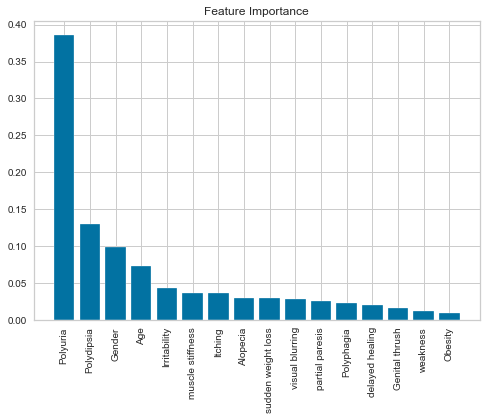

In [98]:
# Calculate feature importances
importances = best_model.best_estimator_.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [data_df.columns[i] for i in indices]

# Create plot
plt.figure()

# Create plot title
plt.title("Feature Importance")

# Add bars
plt.bar(range(X_train_upsampled.shape[1]), importances[indices])

# Add feature names as x-axis labels
plt.xticks(range(X_train_upsampled.shape[1]), names, rotation=90)

# Show plot
plt.show()

### Dimensionality reduction RFE 

In [99]:
gb_classifier = GradientBoostingClassifier()
gb_classifier.set_params(**best_model.best_estimator_.get_params()) 

rfe_model = RFE(gb_classifier, n_features_to_select = 5)

rfe_prediction = rfe_model.fit(X_train_upsampled, y_train_upsampled)
feature_list = rfe_prediction.get_support(indices=True)
key_columns = []
for feature in feature_list:
    print(df_upsampled.columns[feature])
    key_columns.append(df_upsampled.columns[feature])
key_columns.append("class")

Age
Gender
Polyuria
Polydipsia
Irritability


In [100]:
remove_cols = []
df_rfe = df_upsampled.copy(deep=True)
for column in df_rfe.columns:
    if column not in key_columns:
        remove_cols.append(column)
        
rfe_removed = df_rfe.drop(remove_cols, axis=1)
rfe_removed.head()

,Age,Gender,Polyuria,Polydipsia,Irritability,class
0,40,1,0,1,0,1
1,58,1,0,0,0,1
2,41,1,1,0,0,1
3,45,1,0,0,0,1
4,60,1,1,1,1,1


Accuracy :  0.9453125
F1 Score:  0.9357798165137615
Precision:  0.9622641509433962
Recall:  0.9107142857142857
Confuse matrix:
[[70  2]
 [ 5 51]]
True positive:  51
False positive:  2
True negative:  70
False negative:  5
Sensitivity:  0.9107142857142857
Specificity:  0.9722222222222222


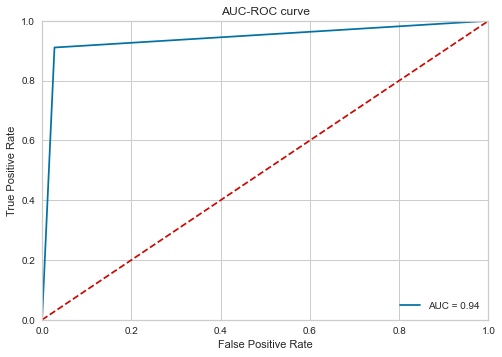

In [102]:
X = rfe_removed.drop("class", axis = 1).values
y = rfe_removed["class"].values
X_train_rfe, X_test_rfe, y_train_rfe, y_test_rfe = train_test_split(X, y, test_size = 0.2, random_state = 1)

rfe_best_model = GradientBoostingClassifier()
rfe_best_model.set_params(**best_model.best_estimator_.get_params())
rfe_best_model.fit(X_train_rfe, y_train_rfe)
rfe_prediction = rfe_best_model.predict(X_test_rfe)

evaluate_model(y_test_upsampled, rfe_prediction)

auc_roc_plot(y_test_upsampled, rfe_prediction)

### Dimensionality reduktion PCA

Accuracy :  0.9609375
F1 Score:  0.9557522123893805
Precision:  0.9473684210526315
Recall:  0.9642857142857143
Confuse matrix:
[[69  3]
 [ 2 54]]
True positive:  54
False positive:  3
True negative:  69
False negative:  2
Sensitivity:  0.9642857142857143
Specificity:  0.9583333333333334


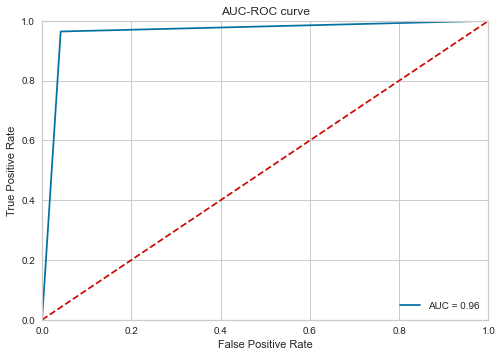

In [104]:
pca = PCA(n_components = 6)
X_train_upsampled_pca = pca.fit_transform(X_train_upsampled)
X_test_upsampled_pca = pca.transform(X_test_upsampled)

gb_classifier = GradientBoostingClassifier()
gb_classifier.set_params(**best_model.best_estimator_.get_params()) 

gb_classifier.fit(X_train_upsampled_pca, y_train_upsampled)
pca_prediction = gb_classifier.predict(X_test_upsampled_pca)

evaluate_model(y_test_upsampled, pca_prediction)

auc_roc_plot(y_test_upsampled, pca_prediction)

## Logistic regression

Accuracy :  0.9296875
F1 Score:  0.923076923076923
Precision:  0.8852459016393442
Recall:  0.9642857142857143
Confuse matrix:
[[65  7]
 [ 2 54]]
True positive:  54
False positive:  7
True negative:  65
False negative:  2
Sensitivity:  0.9642857142857143
Specificity:  0.9027777777777778


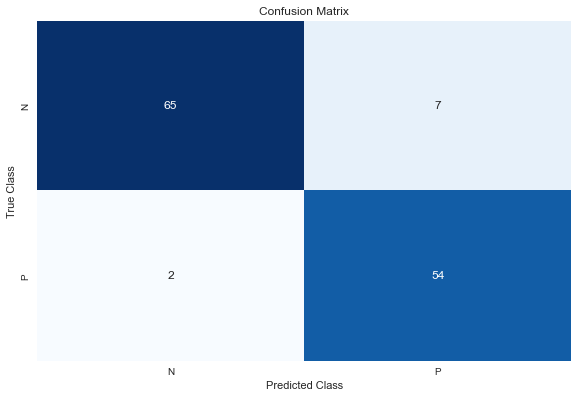

In [107]:
scaler = StandardScaler()
lg_classifier = LogisticRegression()

X_train_upsampled_transformed = scaler.fit_transform(X_train_upsampled)
X_test_upsampled_transformed = scaler.transform(X_test_upsampled)

lg_classifier.fit(X_train_upsampled_transformed, y_train_upsampled)
lg_prediction_upsampled = lg_classifier.predict(X_test_upsampled_transformed)

# model evaluation
evaluate_model(y_test_upsampled, lg_prediction_upsampled)

# Create confusion matrix
matrix = confusion_matrix(y_test_upsampled, lg_prediction_upsampled)
plot_conf_matrix(matrix)

### Podesavanje hiperparametara koriscenjem Grid search

Best params:  {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
Best score:  0.9179897201599087

Accuracy :  0.9375
F1 Score:  0.9310344827586207
Precision:  0.9
Recall:  0.9642857142857143
Confuse matrix:
[[66  6]
 [ 2 54]]
True positive:  54
False positive:  6
True negative:  66
False negative:  2
Sensitivity:  0.9642857142857143
Specificity:  0.9166666666666666


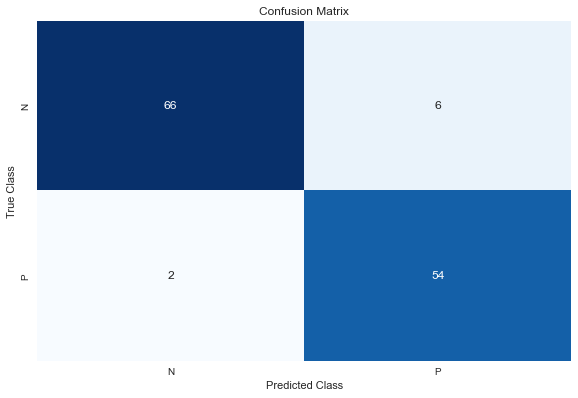

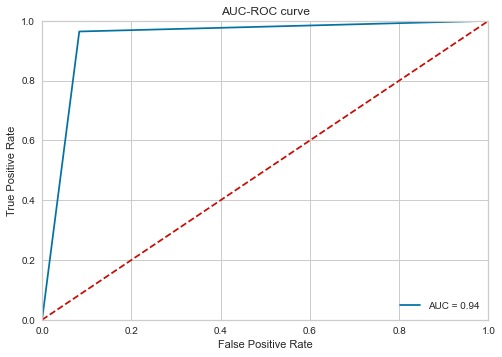

In [110]:
scaler = StandardScaler()
lr_classifier = LogisticRegression()

X_train_upsampled_transformed = scaler.fit_transform(X_train_upsampled)
X_test_upsampled_transformed = scaler.transform(X_test_upsampled)

solver = ['liblinear']
penalty = ['l1', 'l2']
C = np.logspace(0, 4, 10)

hyperparameters = dict(solver=solver, C=C, penalty=penalty)

# Create grid search
gridsearch = GridSearchCV(lr_classifier, hyperparameters, cv=5, verbose=0, n_jobs=-1)

# Fit grid search
gs_best_model = gridsearch.fit(X_train_upsampled_transformed, y_train_upsampled)

print("Best params: ", gridsearch.best_params_)
print("Best score: ", gridsearch.best_score_)
print()

lr_prediction_upsampled = gs_best_model.predict(X_test_upsampled_transformed)

# model evaluation
evaluate_model(y_test_upsampled, lr_prediction_upsampled)

# Create confusion matrix
matrix = confusion_matrix(y_test_upsampled, lr_prediction_upsampled)
plot_conf_matrix(matrix)

# Roc-auc curve
auc_roc_plot(y_test_upsampled, lr_prediction_upsampled)

### Redukcija dimenzionalnosti RFE

In [111]:
lr_classifier = LogisticRegression()
lr_classifier.set_params(**gs_best_model.best_estimator_.get_params())

rfe_model = RFE(lr_classifier, n_features_to_select = 13)

rfe_prediction = rfe_model.fit(X_train_upsampled_transformed, y_train_upsampled)
feature_list = rfe_prediction.get_support(indices=True)
key_columns = []
for feature in feature_list:
    print(df_upsampled.columns[feature])
    key_columns.append(df_upsampled.columns[feature])
key_columns.append("class")

Age
Gender
Polyuria
Polydipsia
sudden weight loss
Polyphagia
Genital thrush
visual blurring
Itching
Irritability
delayed healing
partial paresis
muscle stiffness


In [112]:
remove_cols = []
df_rfe = df_upsampled.copy(deep=True)
for column in df_rfe.columns:
    if column not in key_columns:
        remove_cols.append(column)
        
rfe_removed = df_rfe.drop(remove_cols, axis=1)
rfe_removed.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,class
0,40,1,0,1,0,0,0,0,1,0,1,0,1,1
1,58,1,0,0,0,0,0,1,0,0,0,1,0,1
2,41,1,1,0,0,1,0,0,1,0,1,0,1,1
3,45,1,0,0,1,1,1,0,1,0,1,0,0,1
4,60,1,1,1,1,1,0,1,1,1,1,1,1,1


Accuracy :  0.9375
F1 Score:  0.9272727272727271
Precision:  0.9444444444444444
Recall:  0.9107142857142857
Confuse matrix:
[[69  3]
 [ 5 51]]
True positive:  51
False positive:  3
True negative:  69
False negative:  5
Sensitivity:  0.9107142857142857
Specificity:  0.9583333333333334


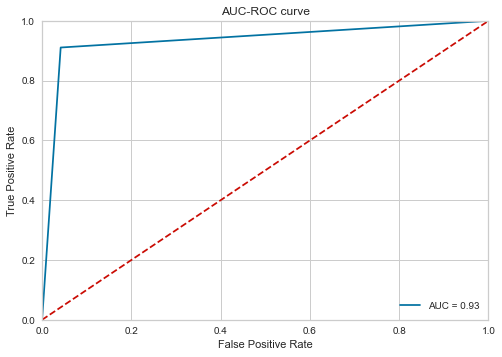

In [114]:
X = rfe_removed.drop("class", axis = 1).values
y = rfe_removed["class"].values
X_train_rfe, X_test_rfe, y_train_rfe, y_test_rfe = train_test_split(X, y, test_size = 0.2, random_state = 1)

lr_classifier = LogisticRegression()
lr_classifier.set_params(**gs_best_model.best_estimator_.get_params())
lr_classifier.fit(X_train_rfe, y_train_rfe)
rfe_prediction = lr_classifier.predict(X_test_rfe)

evaluate_model(y_test_upsampled, rfe_prediction)

auc_roc_plot(y_test_upsampled, rfe_prediction)

### Redukcija dimenzionalnosti PCA

Accuracy :  0.9453125
F1 Score:  0.9369369369369368
Precision:  0.9454545454545454
Recall:  0.9285714285714286
Confuse matrix:
[[69  3]
 [ 4 52]]
True positive:  52
False positive:  3
True negative:  69
False negative:  4
Sensitivity:  0.9285714285714286
Specificity:  0.9583333333333334


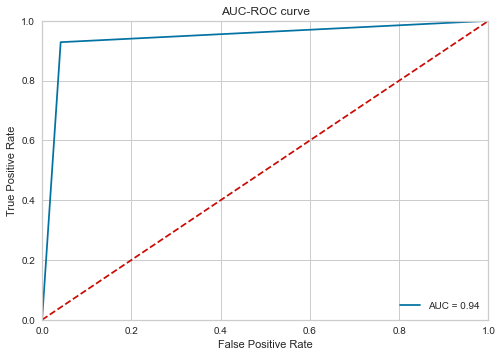

In [116]:
pca = PCA(n_components = 13)
X_train_upsampled_pca = pca.fit_transform(X_train_upsampled_transformed)
X_test_upsampled_pca = pca.transform(X_test_upsampled_transformed)

lr_classifier = LogisticRegression()
lr_classifier.set_params(**gs_best_model.best_estimator_.get_params()) 

lr_classifier.fit(X_train_upsampled_pca, y_train_upsampled)
pca_prediction = lr_classifier.predict(X_test_upsampled_pca)

evaluate_model(y_test_upsampled, pca_prediction)

auc_roc_plot(y_test_upsampled, pca_prediction)